# ONLINE RETAIL (CAPSTONE PROJECT 3) :

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt


In [2]:
df=pd.read_excel("/home/siddharth/Desktop/Project 3/train.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


InvoiceNo	Invoice number. Nominal, a six digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation

StockCode	Product (item) code. Nominal, a five digit integral number uniquely assigned to each distinct product

Description	Product (item) name. Nominal

Quantity	The quantities of each product (item) per transaction. Numeric

InvoiceDate	Invoice Date and time. Numeric, the day and time when each transaction was generated

UnitPrice	Unit price. Numeric, product price per unit in sterling

CustomerID	Customer number. Nominal, a six digit integral number uniquely assigned to each customer

Country	Country name. Nominal, the name of the country where each customer resides


# TASK 1
Perform a preliminary data inspection and data cleaning.

Check for missing data and formulate an apt strategy to treat them.

Remove duplicate data records.

Perform descriptive analytics on the given data.

In [4]:
#data inspection :

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB


In [6]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64

In [7]:
#customer ID and description have missing values 


In [8]:
#Checking for duplicates using Invoice ID as this is unique for each transaction:
df.duplicated().sum()
#Clearly there are many duplicate values as InvoiceNos are unique to each transaction.

2673

In [9]:
df2=df.drop_duplicates()
#dropping rows that have similar info

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376663 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    376663 non-null  object        
 1   StockCode    376663 non-null  object        
 2   Description  375700 non-null  object        
 3   Quantity     376663 non-null  int64         
 4   InvoiceDate  376663 non-null  datetime64[ns]
 5   UnitPrice    376663 non-null  float64       
 6   CustomerID   282420 non-null  float64       
 7   Country      376663 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 25.9+ MB


In [11]:
#cheking missing values again :

In [12]:
df2.isnull().sum()

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94243
Country            0
dtype: int64

In [13]:
df2["CustomerID"].mode()

0    17841.0
dtype: float64

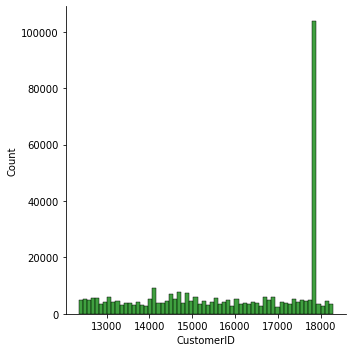

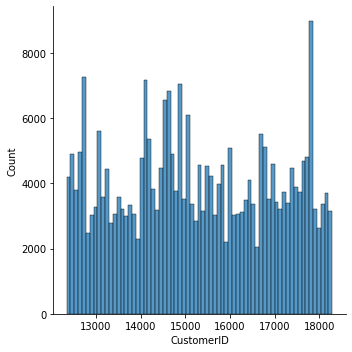

In [14]:

sns.displot(df2["CustomerID"].fillna(17841.0), color= "green")

sns.displot(df2["CustomerID"])

filling Nan values under CustomerID will drasticly change the data. Therefore dropping rows with missing values.

In [15]:
dfdropnull= df2.dropna(subset=["CustomerID"],axis=0)

In [16]:
dfdropnull.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
dfdropnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282420 entries, 1 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    282420 non-null  object        
 1   StockCode    282420 non-null  object        
 2   Description  282420 non-null  object        
 3   Quantity     282420 non-null  int64         
 4   InvoiceDate  282420 non-null  datetime64[ns]
 5   UnitPrice    282420 non-null  float64       
 6   CustomerID   282420 non-null  float64       
 7   Country      282420 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 19.4+ MB


In [18]:
#seems to have handled missing values from Description as well

## Descriptive Analysis

Country
United Kingdom    18765
Germany             578
France              438
EIRE                307
Belgium             114
Spain               101
Netherlands          96
Switzerland          66
Portugal             65
Australia            61
Name: InvoiceNo, dtype: int64


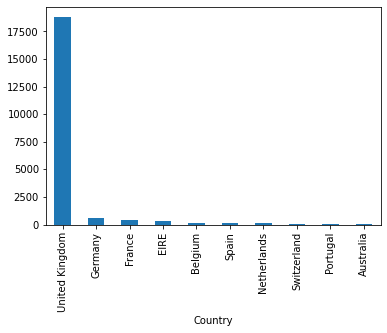

In [19]:
#TOP TEN BUYERS (COUNTRIES): (finding the number of unique Invoice numbers per country)
countrysales= dfdropnull.groupby(["Country"])["InvoiceNo"].nunique()
countrysales=countrysales.sort_values(ascending=False).head(10)
(countrysales).plot(kind="bar")
print(countrysales)

In [20]:
#Most sold and least sold items:
dfdropnull["Description"].nunique()

3833

In [21]:
mostsold=dfdropnull.groupby(["Description"])["Quantity"].sum()
leastsold= mostsold.sort_values(ascending=False).tail(15)
mostsold = mostsold.sort_values(ascending=False).head(15)

<AxesSubplot:xlabel='Description'>

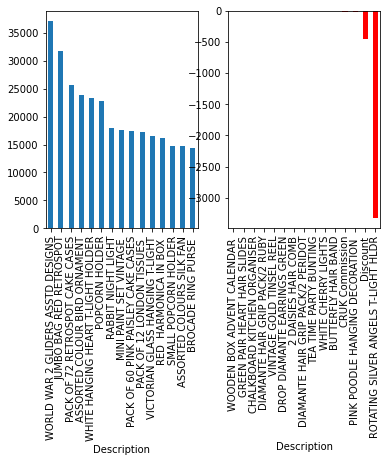

In [22]:
plt.subplot(1,2,1)
mostsold.plot(kind='bar')
plt.subplot(1,2,2)
leastsold.plot(kind="bar", color="red")

Negative sales indicate returns 

In [23]:
# Orders per day:
salesot={"Date": dfdropnull["InvoiceDate"],"InvoiceNo":dfdropnull["InvoiceNo"]}
salesot=pd.DataFrame(salesot)
salesot

,Date,InvoiceNo
1,2011-06-08 14:57:00,556072
2,2011-05-04 10:58:00,551739
3,2011-01-20 12:16:00,541658
4,2010-12-10 17:26:00,538364
5,2011-05-08 15:20:00,552306
...,...,...
379330,2011-05-19 14:35:00,553872
379331,2011-05-27 10:36:00,C554864
379333,2011-10-23 14:47:00,572302
379334,2011-07-07 16:49:00,559339


In [24]:
salesot["Month"]=salesot["Date"].dt.to_period("M")

In [25]:
salesot.head()

,Date,InvoiceNo,Month
1,2011-06-08 14:57:00,556072,2011-06
2,2011-05-04 10:58:00,551739,2011-05
3,2011-01-20 12:16:00,541658,2011-01
4,2010-12-10 17:26:00,538364,2010-12
5,2011-05-08 15:20:00,552306,2011-05


In [26]:
salesot1=salesot.drop(["Date"], axis=1)

<AxesSubplot:title={'center':'MONTHLY ORDERS'}, xlabel='Month', ylabel='Orders'>

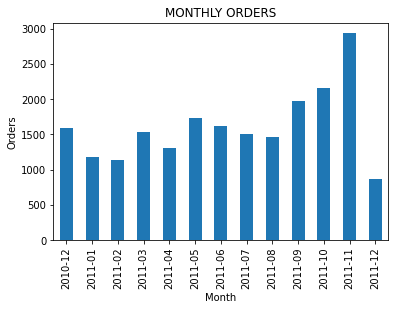

In [27]:
(salesot1.groupby(["Month"])["InvoiceNo"].nunique()).plot(kind="bar", title="MONTHLY ORDERS", ylabel="Orders")

In [28]:
#Total number of cancelled orders:
dfdropnull.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom


In [29]:
InvoiceNo=dfdropnull["InvoiceNo"]

In [30]:
InvoiceNo=pd.DataFrame(InvoiceNo)

In [31]:
InvoiceNo["Cancelled"]=InvoiceNo["InvoiceNo"].str[0]

In [32]:
InvoiceNo["Cancelled"]=InvoiceNo["Cancelled"].fillna(0)
InvoiceNo["Cancelled"]=InvoiceNo["Cancelled"].replace(to_replace='C', value= 1)
InvoiceNo

,InvoiceNo,Cancelled
1,556072,0
2,551739,0
3,541658,0
4,538364,0
5,552306,0
...,...,...
379330,553872,0
379331,C554864,1
379333,572302,0
379334,559339,0


In [33]:
(InvoiceNo["Cancelled"].sum()/InvoiceNo["Cancelled"].count())*100

2.1949578641739254

Two percent of total orders were cancelled.

In [34]:
#Checking percentage of customers who ordered more than once:
cust_orders=dfdropnull.groupby(["CustomerID"])["InvoiceNo"].nunique()
repeat_customer_perc= np.sum(cust_orders > 1 )/dfdropnull["CustomerID"].nunique()
repeat_customer_perc*100

68.64231564438319

## TASK 2:
Data Transformation:

Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts. 

Create month cohorts and analyze active customers for each cohort.

Analyze the retention rate of customers.

In [35]:
# Extracting required features from the the dataframe:
dfcohort= dfdropnull[["CustomerID", "InvoiceNo", "InvoiceDate"]]
dfcohort.head()

,CustomerID,InvoiceNo,InvoiceDate
1,16126.0,556072,2011-06-08 14:57:00
2,18118.0,551739,2011-05-04 10:58:00
3,15529.0,541658,2011-01-20 12:16:00
4,14448.0,538364,2010-12-10 17:26:00
5,13911.0,552306,2011-05-08 15:20:00


In [36]:
#grouping customers based on month of first order (Cohort):
dfcohort["cohort"]=dfcohort.groupby(["CustomerID"])['InvoiceDate'].transform('min').dt.to_period('M')

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
# adding a col for month of purchase by customer to data frame :
dfcohort["order_month"]=dfcohort["InvoiceDate"].dt.to_period('M') 

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
dfcohort

,CustomerID,InvoiceNo,InvoiceDate,cohort,order_month
1,16126.0,556072,2011-06-08 14:57:00,2011-02,2011-06
2,18118.0,551739,2011-05-04 10:58:00,2010-12,2011-05
3,15529.0,541658,2011-01-20 12:16:00,2010-12,2011-01
4,14448.0,538364,2010-12-10 17:26:00,2010-12,2010-12
5,13911.0,552306,2011-05-08 15:20:00,2011-02,2011-05
...,...,...,...,...,...
379330,13050.0,553872,2011-05-19 14:35:00,2010-12,2011-05
379331,15122.0,C554864,2011-05-27 10:36:00,2011-02,2011-05
379333,15427.0,572302,2011-10-23 14:47:00,2011-10,2011-10
379334,13752.0,559339,2011-07-07 16:49:00,2011-04,2011-07


In [39]:
df_cohort = dfcohort.groupby(['cohort', 'order_month']).agg(n_customers=('CustomerID', 'nunique')).reset_index(drop=False)
from operator import attrgetter
df_cohort['period_number'] = (df_cohort["order_month"] - df_cohort["cohort"]).apply(attrgetter('n'))

In [40]:
df_cohort

,cohort,order_month,n_customers,period_number
0,2010-12,2010-12,929,0
1,2010-12,2011-01,350,1
2,2010-12,2011-02,297,2
3,2010-12,2011-03,353,3
4,2010-12,2011-04,332,4
...,...,...,...,...
86,2011-10,2011-11,91,1
87,2011-10,2011-12,45,2
88,2011-11,2011-11,323,0
89,2011-11,2011-12,41,1


In [41]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',columns = 'period_number',values = 'n_customers')

In [42]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,929.0,350.0,297.0,353.0,332.0,367.0,351.0,322.0,325.0,361.0,344.0,460.0,248.0
2011-01,422.0,102.0,120.0,104.0,141.0,122.0,113.0,109.0,132.0,148.0,157.0,66.0,NaN
2011-02,377.0,91.0,72.0,101.0,102.0,91.0,95.0,101.0,97.0,117.0,32.0,NaN,NaN
2011-03,441.0,81.0,110.0,93.0,101.0,76.0,113.0,103.0,125.0,37.0,NaN,NaN,NaN
2011-04,298.0,67.0,65.0,60.0,61.0,71.0,69.0,78.0,23.0,NaN,NaN,NaN,NaN
2011-05,278.0,60.0,48.0,48.0,59.0,69.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,238.0,46.0,43.0,62.0,57.0,80.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,192.0,39.0,38.0,45.0,55.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,166.0,38.0,41.0,41.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Above table shows the number of customers that started making purchases during the same month. and howmany remained over a period of time.

In [43]:
# To check for retention % we must divide each column by initial cohort size:
cohortinitial= cohort_pivot.iloc[:,0]
cohortinitial

cohort
2010-12    929.0
2011-01    422.0
2011-02    377.0
2011-03    441.0
2011-04    298.0
2011-05    278.0
2011-06    238.0
2011-07    192.0
2011-08    166.0
2011-09    298.0
2011-10    352.0
2011-11    323.0
2011-12     39.0
Freq: M, Name: 0, dtype: float64

In [44]:
retention_table=cohort_pivot.divide(cohortinitial, axis = 0)

In [45]:
retention_table

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.0,0.376749,0.319699,0.379978,0.357374,0.395048,0.377826,0.346609,0.349839,0.388590,0.370291,0.495156,0.266954
2011-01,1.0,0.241706,0.284360,0.246445,0.334123,0.289100,0.267773,0.258294,0.312796,0.350711,0.372038,0.156398,NaN
2011-02,1.0,0.241379,0.190981,0.267905,0.270557,0.241379,0.251989,0.267905,0.257294,0.310345,0.084881,NaN,NaN
2011-03,1.0,0.183673,0.249433,0.210884,0.229025,0.172336,0.256236,0.233560,0.283447,0.083900,NaN,NaN,NaN
2011-04,1.0,0.224832,0.218121,0.201342,0.204698,0.238255,0.231544,0.261745,0.077181,NaN,NaN,NaN,NaN
2011-05,1.0,0.215827,0.172662,0.172662,0.212230,0.248201,0.266187,0.104317,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.193277,0.180672,0.260504,0.239496,0.336134,0.105042,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.203125,0.197917,0.234375,0.286458,0.109375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.228916,0.246988,0.246988,0.138554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'CUSTOMER RETENTION'}, xlabel='period_number', ylabel='cohort'>

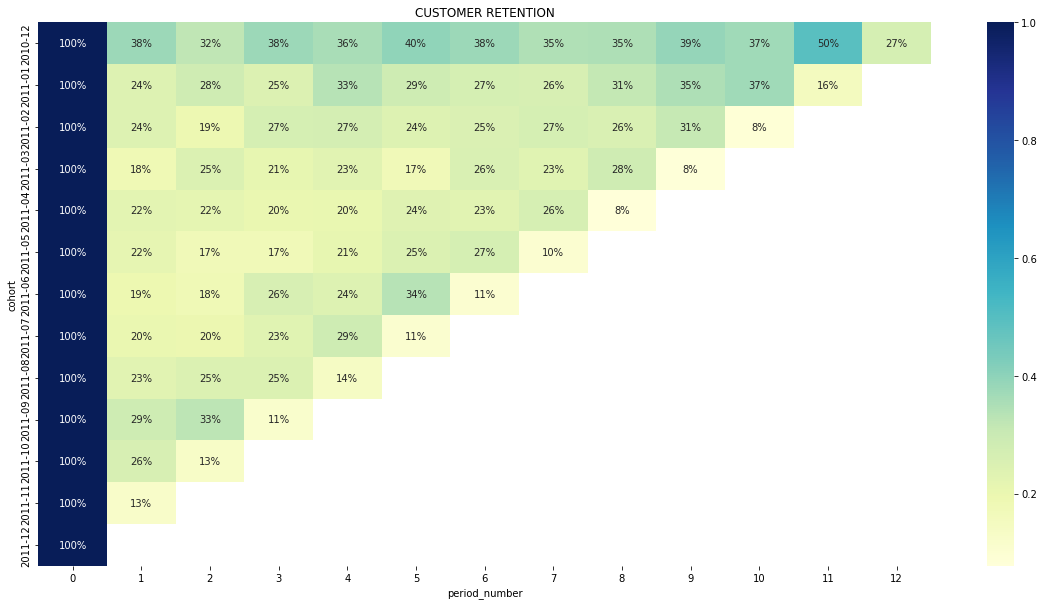

In [46]:
plt.figure(figsize=(20,10))
plt.title("CUSTOMER RETENTION")
sns.heatmap(retention_table, annot=True, fmt='.0%', cmap="YlGnBu")

 ## TASK 3:
Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

Calculate RFM metrics.

Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

Combine three ratings to get a RFM segment (as strings).

Get the RFM score by adding up the three ratings.

Analyze the RFM segments by summarizing them and comment on the findings.



In [47]:
# getting required features(CustomerID, InvoiceNo, InvoiceDate, UnitPrice ):
df2= dfdropnull[["CustomerID", "InvoiceNo", "InvoiceDate", "UnitPrice"]]

In [48]:
df2.head()

,CustomerID,InvoiceNo,InvoiceDate,UnitPrice
1,16126.0,556072,2011-06-08 14:57:00,3.75
2,18118.0,551739,2011-05-04 10:58:00,2.55
3,15529.0,541658,2011-01-20 12:16:00,0.85
4,14448.0,538364,2010-12-10 17:26:00,1.95
5,13911.0,552306,2011-05-08 15:20:00,3.75


In [49]:
#getting total spent by customer under column named "Total_spent"
Total= df2.groupby(["CustomerID"]).agg(Total_Spent=('UnitPrice','sum')).reset_index()

In [50]:
Total.head()

,CustomerID,Total_Spent
0,12346.0,2.08
1,12347.0,348.31
2,12348.0,129.66
3,12349.0,540.41
4,12350.0,18.40


In [51]:
#Frequency is the number of purchase in a given period.(1 Year in this case) 
frequency=df2.groupby(["CustomerID"])["InvoiceNo"].count().reset_index()
Total["Frequency"]= frequency["InvoiceNo"]

In [52]:
Total.head()

,CustomerID,Total_Spent,Frequency
0,12346.0,2.08,2
1,12347.0,348.31,132
2,12348.0,129.66,20
3,12349.0,540.41,50
4,12350.0,18.40,11


In [53]:
#Recency means the number of days since a customer made the last purchase
datemax=df2.groupby(["CustomerID"])["InvoiceDate"].max().reset_index()

In [54]:
dates=df2.groupby(["CustomerID"]).agg(Datemax= ("InvoiceDate", "max")).reset_index()

In [55]:
Present=(dt.datetime.today())

In [56]:
dates["Recency"]=(Present-dates["Datemax"]).dt.days

In [57]:
dates["Recency"]


0       4101
1       3778
2       3851
3       3794
4       4086
        ... 
4348    4053
4349    3956
4350    3783
4351    3779
4352    3818
Name: Recency, Length: 4353, dtype: int64

In [58]:
Total["Recency"]=dates["Recency"]

In [59]:
Total.head()

,CustomerID,Total_Spent,Frequency,Recency
0,12346.0,2.08,2,4101
1,12347.0,348.31,132,3778
2,12348.0,129.66,20,3851
3,12349.0,540.41,50,3794
4,12350.0,18.40,11,4086


In [60]:
rfm=Total

In [61]:
rfm["Recency"]=rfm["Recency"].astype(int)

In [62]:
rfm["r_quartile"]=pd.qcut(rfm["Recency"],   4,     labels=(['1','2','3','4']) )
rfm["f_quartile"]=pd.qcut(rfm["Frequency"], 4,   labels=(['4','3','2','1']))
rfm["m_quartile"]=pd.qcut(rfm["Total_Spent"], 4, labels=(['4','3','2','1']))
# recency= 1 means customer has shopped recently as it tends to 4 time since last buy has increased.
# frequency quartile 1 indicates highest frequency 
# m quartile= 1 indicates highest monitary value 


In [63]:
rfm.head()

,CustomerID,Total_Spent,Frequency,Recency,r_quartile,f_quartile,m_quartile
0,12346.0,2.08,2,4101,4,4,4
1,12347.0,348.31,132,3778,1,1,1
2,12348.0,129.66,20,3851,3,3,2
3,12349.0,540.41,50,3794,2,2,1
4,12350.0,18.40,11,4086,4,4,4


In [64]:
#Combine three ratings to get a RFM segment (as strings).


rfm["RFM_Segment"]= rfm["r_quartile"].astype(str)+rfm["f_quartile"].astype(str)+rfm["m_quartile"].astype(str)

In [65]:
#Get the RFM score by adding up the three ratings.

rfm["RFM_Score"]= rfm["r_quartile"].astype(int)+rfm["f_quartile"].astype(int)+rfm["m_quartile"].astype(int)

In [66]:
rfm


,CustomerID,Total_Spent,Frequency,Recency,r_quartile,f_quartile,m_quartile,RFM_Segment,RFM_Score
0,12346.0,2.08,2,4101,4,4,4,444,12
1,12347.0,348.31,132,3778,1,1,1,111,3
2,12348.0,129.66,20,3851,3,3,2,332,8
3,12349.0,540.41,50,3794,2,2,1,221,5
4,12350.0,18.40,11,4086,4,4,4,444,12
...,...,...,...,...,...,...,...,...,...
4348,18280.0,19.75,5,4053,4,4,4,444,12
4349,18281.0,37.29,5,3956,4,4,3,443,11
4350,18282.0,44.01,9,3783,1,4,3,143,8
4351,18283.0,840.62,511,3779,1,1,1,111,3


In [67]:
#Analyze the RFM segments by summarizing them and comment on the findings.
rfm_Segs=rfm.groupby(["RFM_Segment"])["CustomerID"].nunique().reset_index()
rfm_Segs.head()

,RFM_Segment,CustomerID
0,111,506
1,112,66
2,121,50
3,122,197
4,123,52


In [68]:
# % OF CUSTOMERS BELONGING TO BEST RFM SEGMENT 
print (rfm_Segs["CustomerID"].iloc[0]/rfm_Segs["CustomerID"].sum()*100)
print(rfm_Segs["CustomerID"].iloc[-1]/rfm_Segs["CustomerID"].sum()*100)

11.62416724098323
9.464736963014014


**Comments on RFM SEGMENT:** 

1) recency= 1 means customer has shopped recently as it tends to 4 time since last buy    has increased.

2) frequency quartile 1 indicates highest frequency 

3) m quartile= 1 indicates highest monitary value

4) 11.28% of customers belong to the best RFM Segment "111"

5) 9.5% of customers belong to the worst RFM Segment "444"


## TASK 3

Data Modeling :

Create clusters using k-means clustering algorithm.

Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

Decide the optimum number of clusters to be formed.

Analyze these clusters and comment on the results.

In [69]:
# Getting required data for clustering algorithtm:(CustomerID,Total_Spent,Frequency,Recency):
df4 = rfm[["CustomerID","Total_Spent","Frequency","Recency"]]

In [70]:
df4.head()

,CustomerID,Total_Spent,Frequency,Recency
0,12346.0,2.08,2,4101
1,12347.0,348.31,132,3778
2,12348.0,129.66,20,3851
3,12349.0,540.41,50,3794
4,12350.0,18.40,11,4086


<AxesSubplot:>

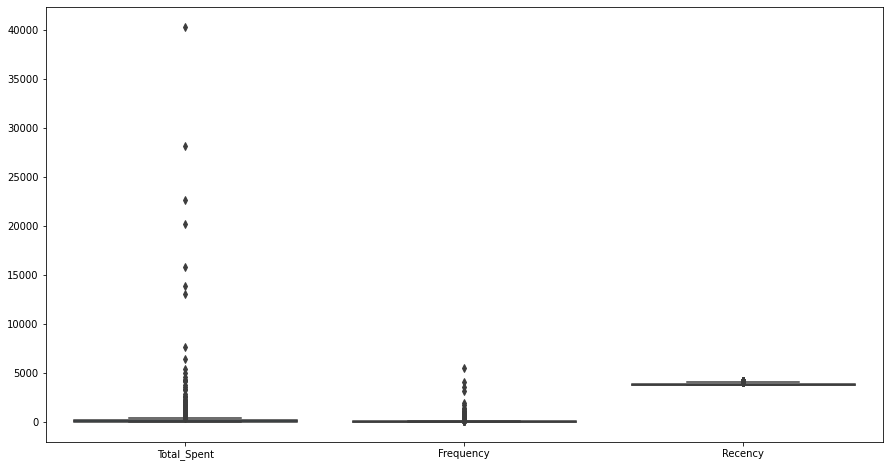

In [71]:
# Checking for outliers:
plt.figure(figsize=(15,8))
Attributes= ["Total_Spent", "Frequency", "Recency"]
sns.boxplot(data=df4[Attributes])

In [72]:
#Checking skewness of features:
# All features are positively skewed indicating longer tails on the right 
print ("Skew TS:",df4["Total_Spent"].skew())
print ("Skew F:", df4 ["Frequency"].skew())
print ("Skew R:", df4["Recency"].skew() )

Skew TS: 25.603757223694085
Skew F: 18.123899279536626
Skew R: 1.2416337391035497


2.8203628557360134

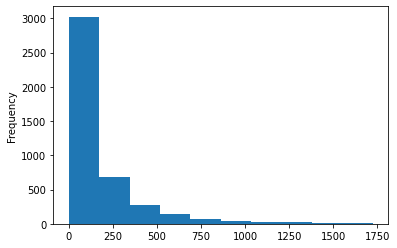

In [73]:
# Reducing skewness for "Total_Spent"
ts_Q1=df4["Total_Spent"].quantile(0.01)
ts_Q3=df4["Total_Spent"].quantile(0.95)
ts_IQR= ts_Q3-ts_Q1
ts_upper= ts_Q3 + (1.5 * ts_IQR)
ts_lower= ts_Q1 - (1.5 * ts_IQR)
df4clean = df4[(df4.Total_Spent <=ts_upper) & (df4.Total_Spent >= ts_lower)]
df4clean["Total_Spent"].plot(kind="hist")
df4clean["Total_Spent"].skew()

5.672131167036097

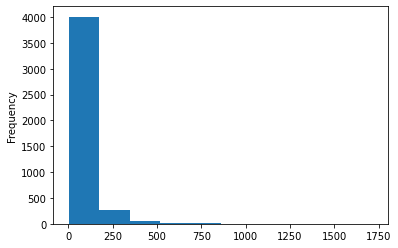

In [74]:
# Reducing skewness for "Frequency"
f_Q1=df4["Frequency"].quantile(0.05)
f_Q3=df4["Frequency"].quantile(0.95)
f_IQR= f_Q3-f_Q1
f_upper= f_Q3 + (1.5 * f_IQR)
f_lower= f_Q1 - (1.5 * f_IQR)
df4clean = df4[(df4.Frequency <=ts_upper) & (df4.Frequency >= ts_lower)]
df4clean["Frequency"].plot(kind="hist")
df4clean["Frequency"].skew()

In [75]:
df4clean.head()

,CustomerID,Total_Spent,Frequency,Recency
0,12346.0,2.08,2,4101
1,12347.0,348.31,132,3778
2,12348.0,129.66,20,3851
3,12349.0,540.41,50,3794
4,12350.0,18.40,11,4086


In [76]:
#Standardising using Standard scaler:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [77]:
dfstd= df4clean.drop("CustomerID", axis=1)

In [78]:
dfstd=std.fit_transform(dfstd)

In [79]:
dfstd

array([[-0.2560409 , -0.60006185,  2.30047783],
       [ 0.16787507,  0.72788534, -0.89264992],
       [-0.09983491, -0.41619224, -0.17098327],
       ...,
       [-0.20470278, -0.528557  , -0.84322069],
       [ 0.77064801,  4.59936212, -0.88276407],
       [-0.16287807, -0.10974289, -0.49721614]])

In [80]:
dfstd=pd.DataFrame(dfstd, columns=["Total_Spent","Recency","Frequency"])

In [81]:
dfstd

,Total_Spent,Recency,Frequency
0,-0.256041,-0.600062,2.300478
1,0.167875,0.727885,-0.892650
2,-0.099835,-0.416192,-0.170983
3,0.403078,-0.109743,-0.734476
4,-0.236059,-0.508127,2.152190
...,...,...,...
4343,-0.234406,-0.569417,1.825957
4344,-0.212931,-0.569417,0.867030
4345,-0.204703,-0.528557,-0.843221
4346,0.770648,4.599362,-0.882764


In [82]:
from sklearn.cluster import KMeans


In [83]:
#Finding optimal number of clusters using elbow method:
z=[]
range_clusters = [2,3,4,5,6,7,8]
for x in range_clusters:
    kmeans= KMeans(n_clusters= x)
    kmeans.fit(dfstd)
    
    z.append(kmeans.inertia_)


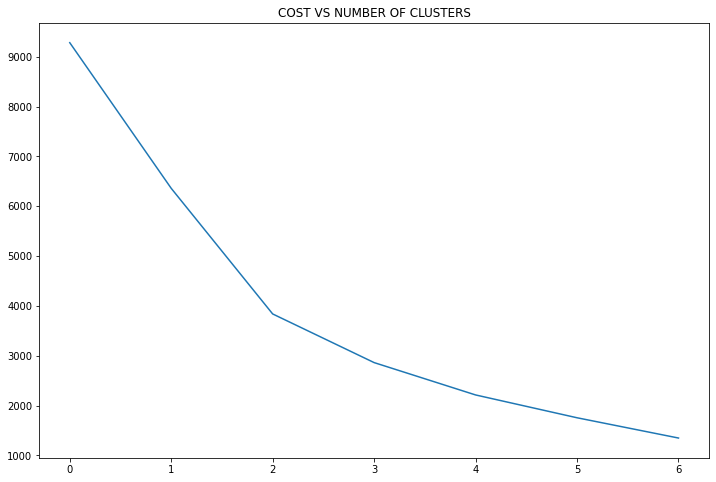

In [84]:
plt.figure(figsize=(12,8))
plt.title("COST VS NUMBER OF CLUSTERS")
plt.plot(z)

**Using 3 as number of clusters.**

In [85]:
km=KMeans(n_clusters=3 )
km.fit(dfstd)

KMeans(n_clusters=3)

In [86]:
km.labels_

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [87]:
dfstd["Cluster I.D"]= km.labels_

In [88]:
dfstd["Customer I.D"]=df4clean["CustomerID"]

In [89]:
dfstd

,Total_Spent,Recency,Frequency,Cluster I.D,Customer I.D
0,-0.256041,-0.600062,2.300478,2,12346.0
1,0.167875,0.727885,-0.892650,0,12347.0
2,-0.099835,-0.416192,-0.170983,0,12348.0
3,0.403078,-0.109743,-0.734476,0,12349.0
4,-0.236059,-0.508127,2.152190,2,12350.0
...,...,...,...,...,...
4343,-0.234406,-0.569417,1.825957,2,18273.0
4344,-0.212931,-0.569417,0.867030,2,18274.0
4345,-0.204703,-0.528557,-0.843221,0,18276.0
4346,0.770648,4.599362,-0.882764,0,18277.0


In [90]:
clusters= dfstd.groupby(["Cluster I.D"])["Customer I.D"].nunique().reset_index()
clusters["Percentage"]=( clusters["Customer I.D"]/clusters["Customer I.D"].sum())*100
clusters

,Cluster I.D,Customer I.D,Percentage
0,0,3202,73.727838
1,1,4,0.092102
2,2,1137,26.180060


([<matplotlib.patches.Wedge at 0x7fd34c26db90>,
 [Text(-0.7461183036585675, 0.8082743822153847, 'cluster0'),
  Text(-0.08465875072356428, -1.0967373869463581, 'cluster1'),
  Text(0.7484539291147279, -0.8061120988998528, 'cluster2')])

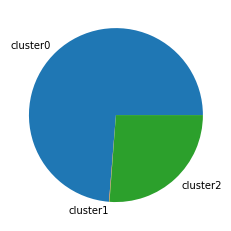

In [91]:
plt.pie(clusters["Customer I.D"],labels= ["cluster0", "cluster1", "cluster2"])

**COMMENTS:
Three clusters have been created based on customers RFM trends.
Of the three clusters cluster0 has the least number of customers (4.5%)
Cluster1 has the most number of customers(70%)
the remaining customers belong to cluster2 (25%)**


In [92]:
dfstd["Rfm_Score"]= rfm["RFM_Score"]

In [104]:
dfstd["Rfm_segment"]= rfm["RFM_Segment"]


In [94]:
clusterRFM= dfstd.groupby(["Cluster I.D"])["Rfm_Score"].sum()

In [95]:
clusterRFM= clusterRFM.reset_index()

In [96]:
clusterRFM

,Cluster I.D,Rfm_Score
0,0,23711
1,1,18
2,2,8836


**Cluster 0 has the highest Rfm score. these are the most profitable customers**

## TASK 4
Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following: 

Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

Bar graph to show the count of orders vs. hours throughout the day

Plot the distribution of RFM values using histogram and frequency charts

Plot error (cost) vs. number of clusters selected

Visualize to compare the RFM values of the clusters using heatmap.

In [97]:
#Getting required information from data to use in tableau:

In [98]:
rfm.to_excel("Online Retail RFM.xlsx")


In [99]:
dfstd.to_excel("Online Retail Clusters.xlsx")

In [100]:
z=pd.DataFrame(z)
z.to_excel("Inertia_Clusters.xlsx")

In [105]:
dfstd.to_excel("RFM and CLUSTERS.xlsx")